## Author : Abdallah Mohamed Saad
### Decision Tree Prediction

In [1]:
import pandas as pd
from sklearn import tree

df = pd.read_csv('../data/Iris.csv', index_col='Id')
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df['Species'] = pd.factorize(df['Species'])[0]

In [3]:
df.duplicated().sum()

3

In [4]:
df.drop_duplicates(inplace=True)

### Training

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Species')
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print("Training Complete.")

Training Complete.


In [6]:
y_pred = classifier.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
Id,,
102,2,2
96,1,1
57,1,1
106,2,2
101,2,2
78,1,2
92,1,1
56,1,1
47,0,0


### Calculating accuracy

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

0.9333333333333333

### Visualization

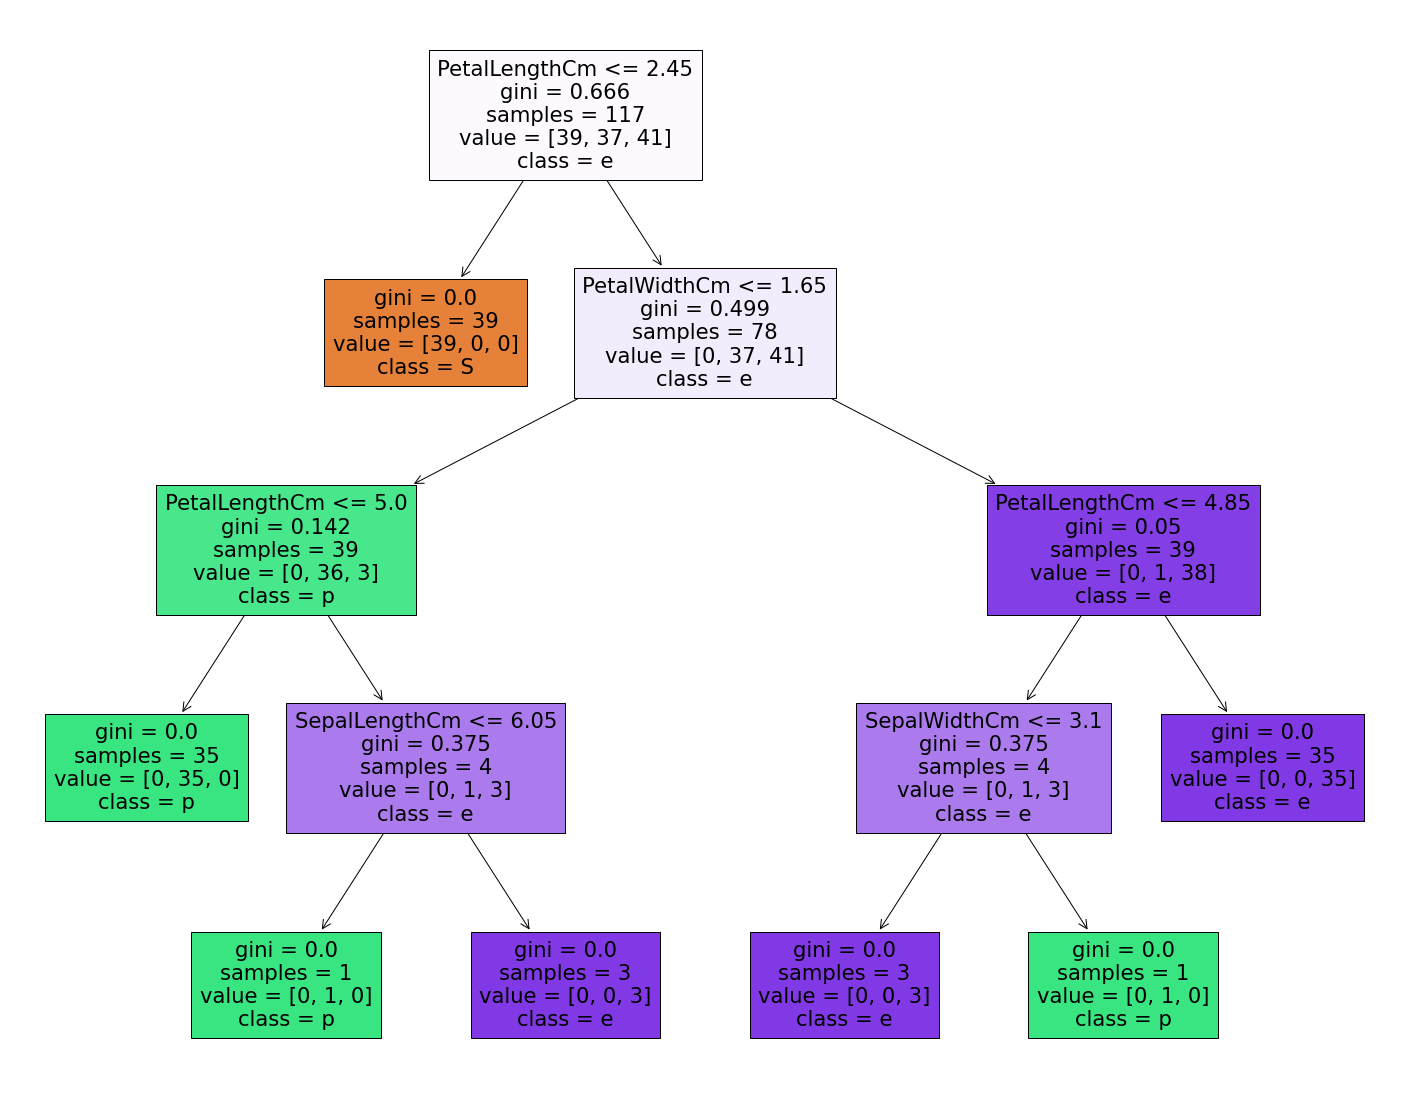

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(classifier,
                   feature_names=list(df.columns),
                   class_names=df['Species'].name,
                   filled=True)